In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("car.csv")

In [3]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [4]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [7]:
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
(data.isnull().sum()/len(data))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [9]:
data = data.drop(["S.No."],axis=1)

In [10]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [11]:
from datetime import date
date.today().year
data["Car_Age"]=date.today().year-data['Year']

In [12]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Car_Age'],
      dtype='object')

In [13]:
data.Name.str.split()

0                            [Maruti, Wagon, R, LXI, CNG]
1                 [Hyundai, Creta, 1.6, CRDi, SX, Option]
2                                        [Honda, Jazz, V]
3                                   [Maruti, Ertiga, VDI]
4                  [Audi, A4, New, 2.0, TDI, Multitronic]
                              ...                        
7248               [Volkswagen, Vento, Diesel, Trendline]
7249                          [Volkswagen, Polo, GT, TSI]
7250                          [Nissan, Micra, Diesel, XV]
7251                          [Volkswagen, Polo, GT, TSI]
7252    [Mercedes-Benz, E-Class, 2009-2013, E, 220, CD...
Name: Name, Length: 7253, dtype: object

In [14]:
data['Brand']=data.Name.str.split().str.get(0)

In [15]:
data.shape

(7253, 15)

In [16]:
data['Model']=data.Name.str.split().str.get(1)+data.Name.str.split().str.get(2)

In [17]:
data[['Name',"Brand","Model"]]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [18]:
data["Brand"].replace({"ISUZU":"Isuzu",'Mini':"Mini Cooper",
                        "Land" : "Land Rover" },inplace = True)

In [19]:
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [21]:
data['Year'].skew()

-0.8398161508976376

In [31]:
num_col = data.select_dtypes(exclude = ['object']).columns
num_col

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age'], dtype='object')

In [32]:

cat_col = data.select_dtypes(include = ['object']).columns

In [33]:
data['Price'].skew()

3.3352319876668415

Year
skew : -0.84


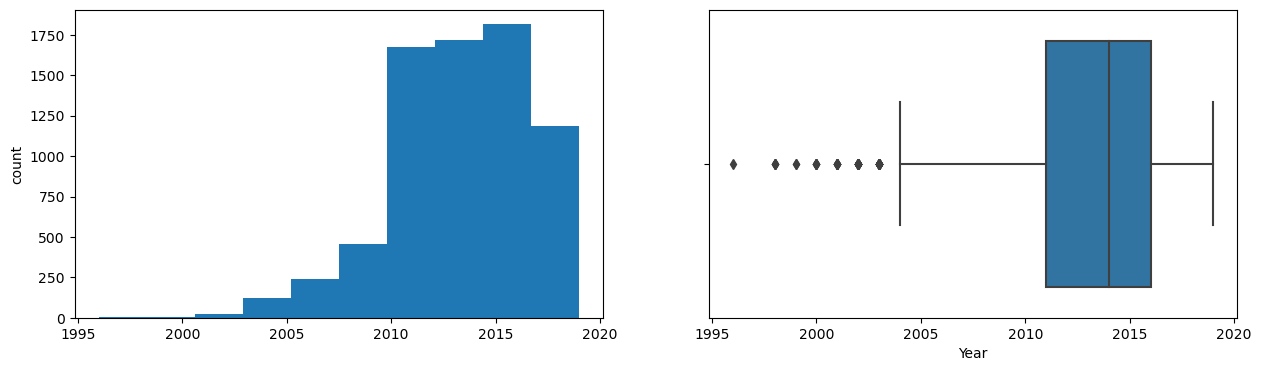

Kilometers_Driven
skew : 61.58


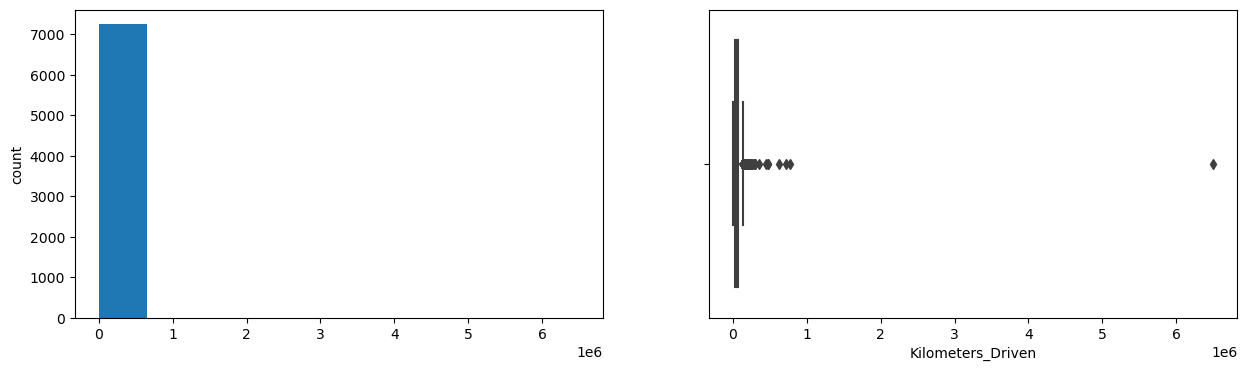

Seats
skew : 1.9


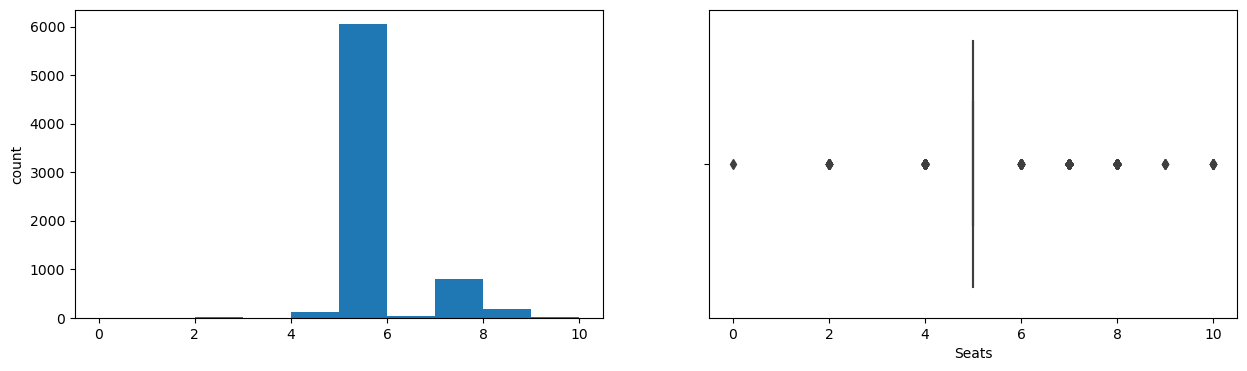

Price
skew : 3.34


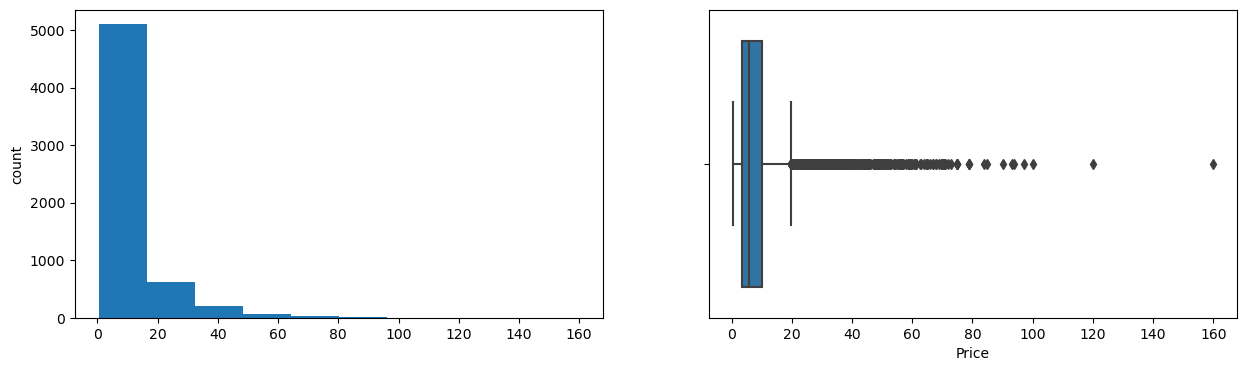

Car_Age
skew : 0.84


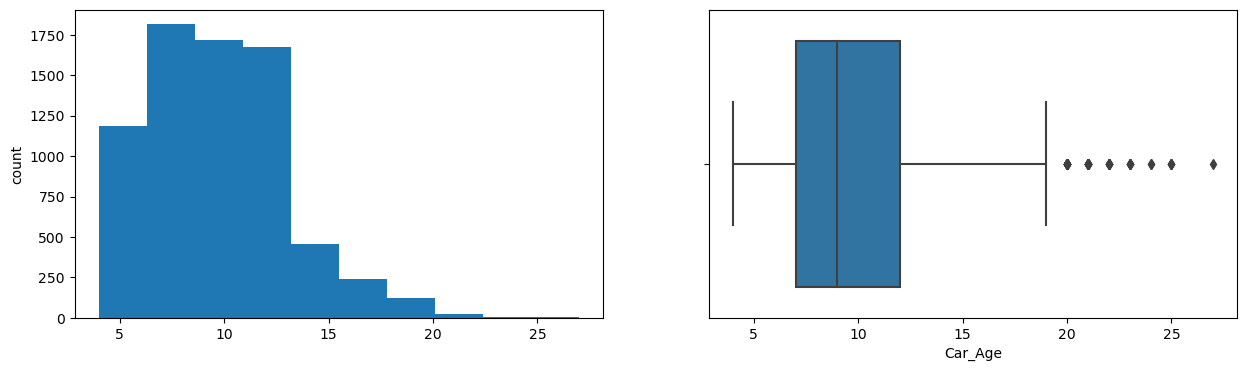

In [34]:
for col in num_col:
    print(col)
    print("skew :" ,round(data[col].skew(),2))
    plt.figure(figsize = (15,4))
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

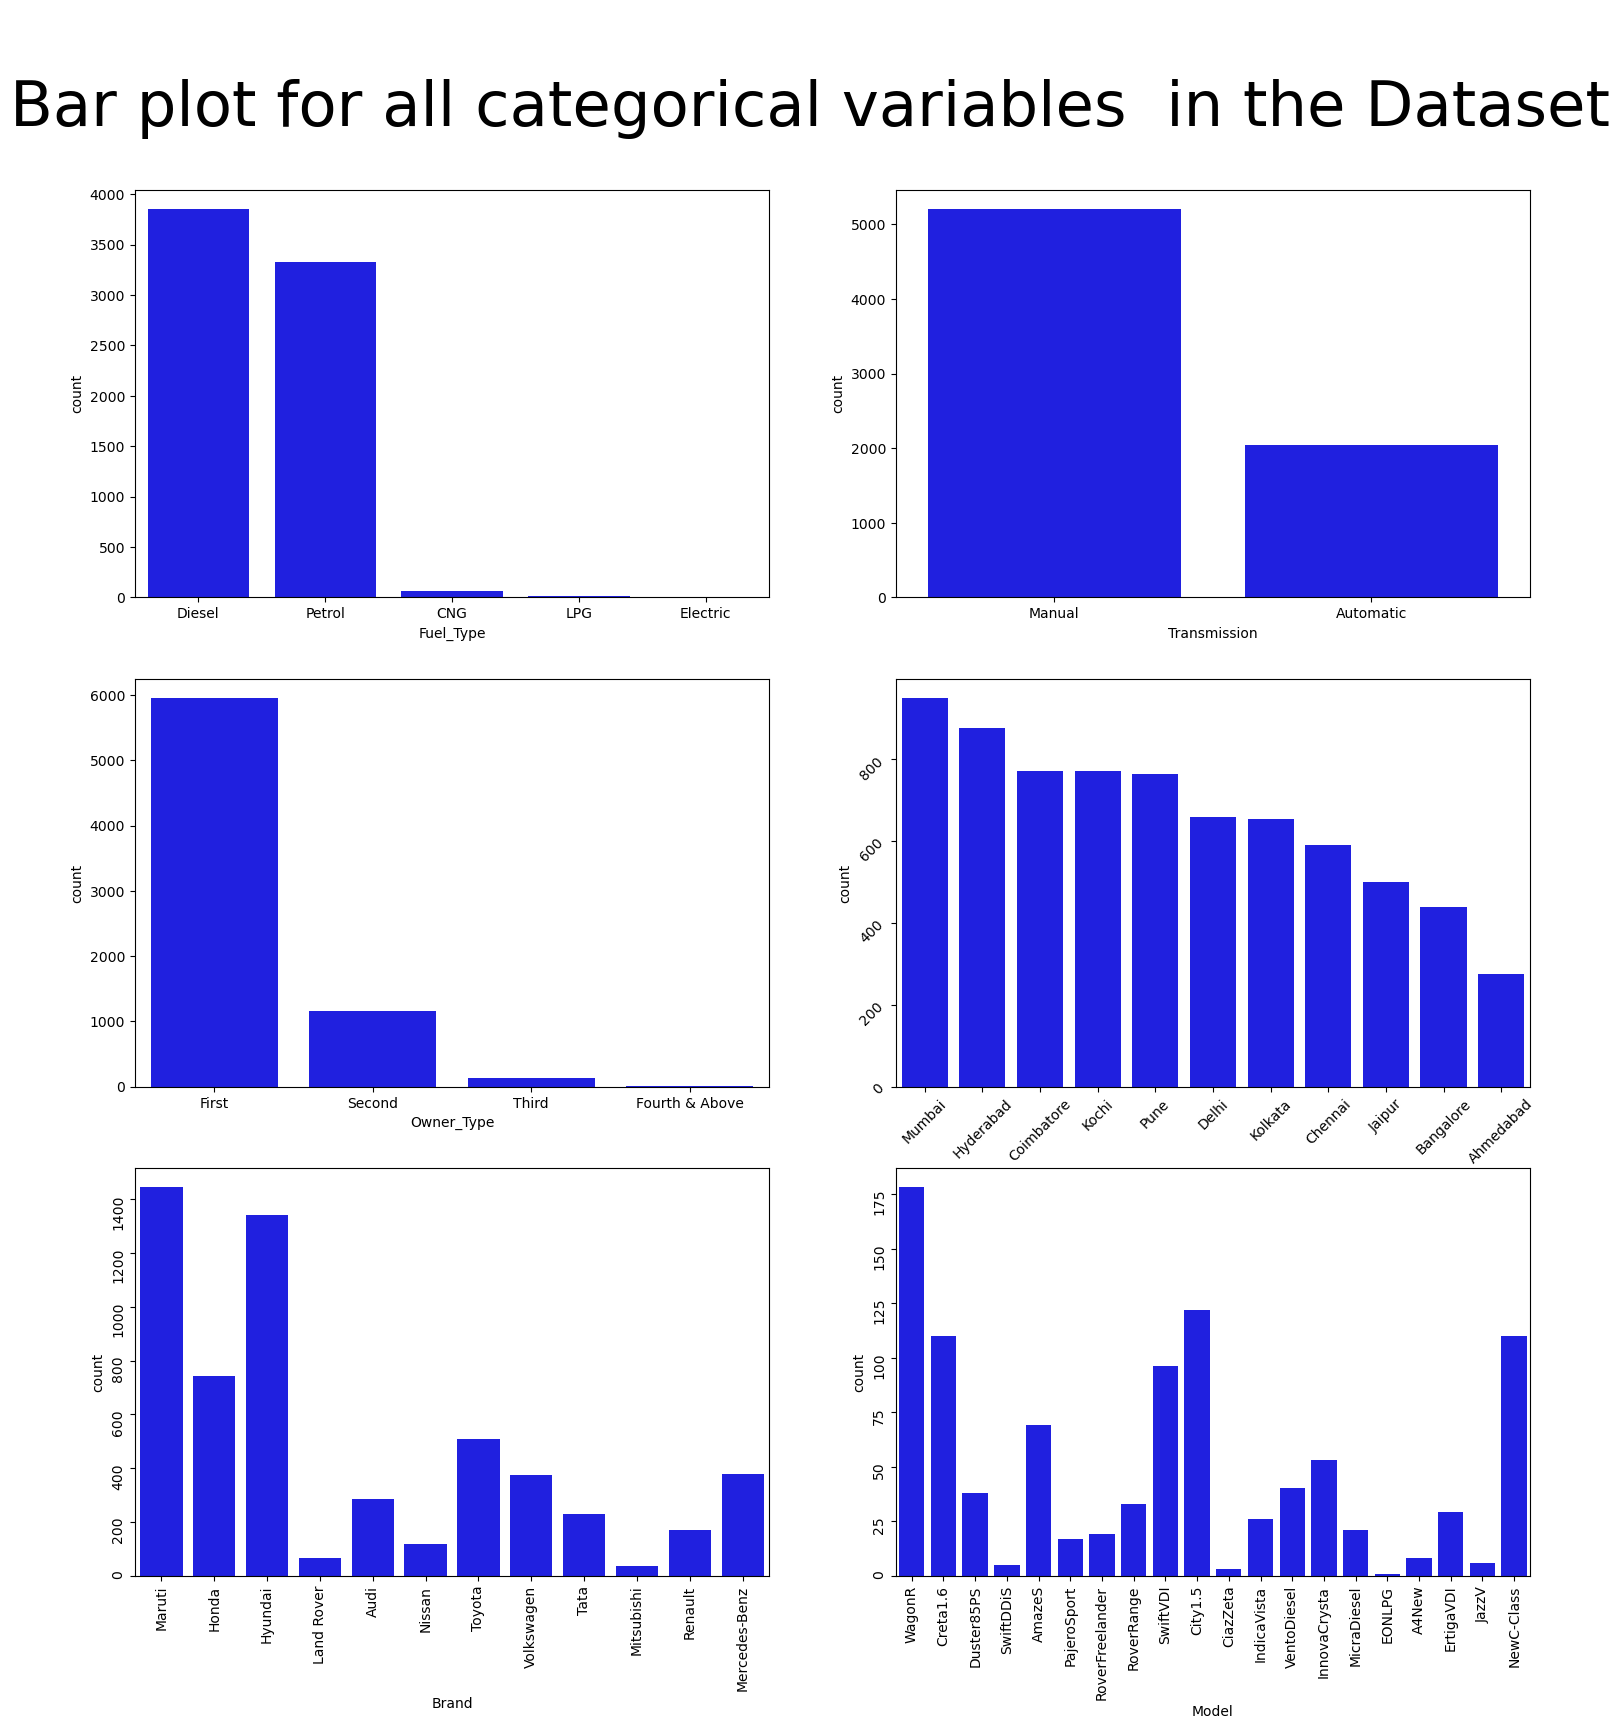

In [48]:
fig,axes = plt.subplots(3,2,figsize = (18,18))
fig.suptitle('\nBar plot for all categorical variables  in the Dataset',size=45)

#sns.countplot(ax=axes[0,0],x='col',data = df,color='c',order=df['col'].value_counts().index) sample program
sns.countplot(ax=axes[0,0],x='Fuel_Type',data = data,color='blue',order=data['Fuel_Type'].value_counts().index)
sns.countplot(ax=axes[0,1],x='Transmission',data = data,color='blue',order=data['Transmission'].value_counts().index)
sns.countplot(ax=axes[1,0],x='Owner_Type',data = data,color='blue',order=data['Owner_Type'].value_counts().index)
sns.countplot(ax=axes[1,1],x='Location',data = data,color='blue',order=data['Location'].value_counts().index)
sns.countplot(ax=axes[2,0],x='Brand',data = data,color='blue',order=data['Brand'].head(20).value_counts().index)
sns.countplot(ax=axes[2,1],x='Model',data = data,color='blue',order=data['Model'].head(20).value_counts().index)
axes[1][1].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=90)